# Trabalho 1

## Problema 2

In [91]:
import random
import math
import networkx as nx
import networkx.algorithms.approximation as ap
import numpy as np
import matplotlib.pyplot as plt
from pyscipopt import Model, quicksum

### A) Criar grafo

In [92]:
    N = 5
    MAXEDGES = N * (N-1)
    MINEDGES = N
    

In [93]:
def criaGrafo(N):
    
    
    #criar um grafo vazio
    grafo = nx.DiGraph()
    
    
    #criar nodos
    grafo.add_nodes_from(range(1,N+1))
    
    
    
    
    for i in grafo.nodes:

        #1) Adicionar uma arestas
        t=np.random.choice(grafo.nodes)
        opt=random.choice([1,2])
        if(opt>1):
            grafo.add_edge(i,t)
            grafo.add_edge(t,i)
        else:
            grafo.add_edge(i,t)


        #2) Adicionar mais arestas    
        for j in range(1, N-1):
            #prob2=(math.pow(2,-j))/2
            prob=(math.pow(2,-j))
            opt=random.choice([1,2])
            e=np.random.choice(grafo.nodes)

            if (random.random() < prob):

                if (opt<2):
                    grafo.add_edge(i,e)
                else:
                    grafo.add_edge(i,e)
                    grafo.add_edge(e,i)
    

    return(grafo)


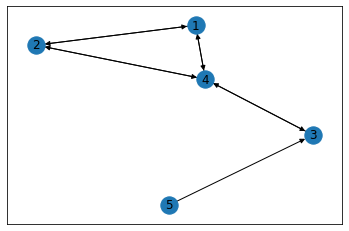

In [94]:
p= criaGrafo(N)
nx.draw_networkx(p)

In [95]:
 
    
def verificaLigado(graph):    
    flag = 1


    #print(nx.is_connected(graph))


    while(flag==1):


        if nx.is_strongly_connected(graph):

            flag=0
            

        else:
            graph=criaGrafo(N)
            
    return  graph

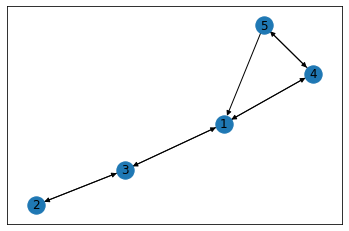

In [96]:
graph=criaGrafo(N)
grafo=verificaLigado(graph)
nx.draw_networkx(grafo)

### B) CORTE MAXIMO

Primeiramente, criamos um array caminhos que guarda todos os caminhos presentes no grafo entre dois vértices i e j tais que i!=j.

In [97]:
caminhos = []
for i in range(1,N+1):
    for j in range(i+1,N+1):
        for w in nx.all_simple_paths(grafo, i, j):
            caminhos.append(w)
        for w in nx.all_simple_paths(grafo, j, i):
            caminhos.append(w)
            
            
print(caminhos)

[[1, 3, 2], [2, 3, 1], [1, 3], [3, 1], [1, 4], [4, 1], [4, 5, 1], [1, 4, 5], [5, 4, 1], [5, 1], [2, 3], [3, 2], [2, 3, 1, 4], [4, 1, 3, 2], [4, 5, 1, 3, 2], [2, 3, 1, 4, 5], [5, 4, 1, 3, 2], [5, 1, 3, 2], [3, 1, 4], [4, 1, 3], [4, 5, 1, 3], [3, 1, 4, 5], [5, 4, 1, 3], [5, 1, 3], [4, 5], [5, 4], [5, 1, 4]]


Gera-se então o modelo cidade com as variáveis:

=> arr de dimensão igual ao número de caminhos
presentes no grafo, onde P [i] = 1, significa que o i-ésimo caminho está presente na solução.


=> mat uma matriz de dimensão L × C, sendo L o número de nodos no grafo e C o número de caminhos
presentes no grafo, onde M [i][j] = 1 significa que o vértice i está presente no j-ésimo caminho.

Preenchemos a matriz M com os devidos valores.

In [98]:
# gerar matriz de incidência
# a matriz é composta por: (nodos) x (nodos)
matIncidencia = np.zeros((N, N))

#print(matIncidencia)

matIncidencia = nx.adjacency_matrix(grafo).toarray()

print(matIncidencia)

# definição de set_cover da aula 6
def set_cover(A):
    x = {}
    cover = Model()
    
    S = len(A)    # j - número de nodos
    U = len(A[0]) # i - número de caminhos
    
    for j in range(S):
        x[j] = cover.addVar('', vtype = 'B')

    for i in range(U):
        cover.addCons(quicksum((x[j] * A[j][i]) for j in range(S)) >= 1)
    
    cover.setObjective(quicksum(x.values()), sense = 'minimize')
    cover.optimize()
            
    if cover.getStatus() == 'optimal':
        return[(j) for j in range(S) if cover.getVal(x[j]) == 1]

lista_caminhos = set_cover(matIncidencia)
print(lista_caminhos)

[[0 0 1 1 0]
 [0 1 1 0 0]
 [1 1 0 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]]
[0, 2, 3]


Número de caminhos removidos:  21


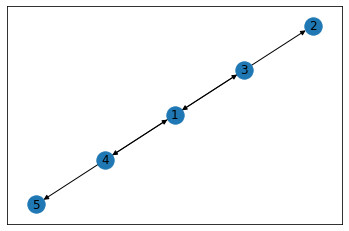

In [99]:
# desenhar o grafo optimizado

# criar um grafo vazio
grafo_optimizado = nx.DiGraph()
        
# criar os nodos
grafo_optimizado.add_nodes_from(range(1, N + 1))

n_caminhos_optimizado = 0
# adicionar todos os caminhos
for caminho in lista_caminhos:
    for i in range(N):
        if matIncidencia[caminho][i] == 1 and caminho != i:
            grafo_optimizado.add_path([caminho + 1, i + 1])
            #grafo_optimizado.add_path([i + 1, caminho + 1])
            n_caminhos_optimizado += 1
            
            
# adicionar as arestas
#for caminho in lista_caminhos:
#    grafo_optimizado.add_path(caminhos[caminho])

total_caminhos = len(caminhos)
caminhos_removidos = total_caminhos - n_caminhos_optimizado
print("Número de caminhos removidos: ", caminhos_removidos)
nx.draw_networkx(grafo_optimizado)

##### 2. Criar as restrições